In [1]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.9 MB/s eta 0:00:00


#**Overall concept on why you should code CHSH**

The coding aspect of CHSH inequality tests involves creating quantum circuits to prepare and measure entangled states, running these circuits on quantum simulators or actual quantum hardware, and analyzing the results to compute the CHSH inequality value. It is the key concept to combining theoretical concepts with experimental data.

**Calculating the winning probability for CHSH using python**

In [2]:
import numpy as np

def simulate_chsh_game():
    # Define the measurement settings
    # Four angles that correspond to the measurement settings of Alice and Bob.
    theta_a0 = 0
    theta_a1 = np.pi / 2
    theta_b0 = np.pi / 4
    theta_b1 = -np.pi / 4

    # Initializing the variables to determine outcomes
    total_shots = 0
    winning_shots = 0

    # Number of estimations to simulate
    shots = 10000

    for _ in range(shots):
        # generate a random int for both a (alice) and b (bob)
        a = np.random.randint(2)
        b = np.random.randint(2)

        # Define the angles based on measurement settings
        # The orientation used in quantum mechanics to determine the measurement outcome probabilities.
        if a == 0:
            theta_a = theta_a0
        else:
            theta_a = theta_a1

        if b == 0:
            theta_b = theta_b0
        else:
            theta_b = theta_b1

        # Simulate the measurement outcomes
        # Using angles theta_a and theta_b to compute probabilities
        p0 = (1 + np.cos(theta_a - theta_b)) / 2
        p1 = 1 - p0

        # Randomly choose measurement outcomes
        outcome = np.random.choice([0, 1], p=[p0, p1])

        # Increment the total shots
        total_shots += 1

        # Check the winning condition (x XOR y == a AND b)
        if outcome == ((a * b) % 2):
            winning_shots += 1

    # Calculate the winning probability
    winning_probability = winning_shots / total_shots
    return winning_probability

# Calculate and print the winning probability
winning_probability = simulate_chsh_game()
print(f'Winning Probability: {winning_probability}')

Winning Probability: 0.8521


##**Information for *Function create_chsh_circuits(theta_values)***

### **Output of this code:** Returns a list circuits containing Quantum Circuit objects configured for CHSH experiments.
**Details**

* Constructs circuits for all combinations of theta values (all rotational angle values) and measurement bases ('00', '01', '10', '11').

* Applies Hadamard gates, entangles qubits using CNOT gates, and rotates qubits around the y-axis based on theta.

* Applies Hadamard gates conditionally based on the chosen measurement basis.

* Measures both qubits after circuit preparation.



In [3]:
from qiskit import QuantumCircuit
import numpy as np

def create_chsh_circuits(theta_values):
    circuits = []

    for theta in theta_values:
        bases = ['00', '01', '10', '11']
        for basis in bases:
            circuit = QuantumCircuit(2, 2)
            circuit.h(0)  # Apply Hadamard gate to qubit 0
            circuit.cx(0, 1)  # Apply CNOT to qubits 0 and 1 -- create a bell state
            circuit.ry(theta, 0)  # Rotate qubit 0 around the y-axis
            for qubit_idx in range(2):
                if basis[qubit_idx] == '1':
                    circuit.h(qubit_idx)  # Apply Hadamard gate based on basis - creates a superposition
            circuit.measure([0, 1], [0, 1])  # Measure both qubits
            circuits.append(circuit)

    return circuits


##**Information for *Function compute_chsh_expectation(counts_list))***

###**Purpose** Computes the expectation values for the CHSH inequality from measurement outcomes.

### **Output of this code:** Returns two lists (witness1, witness2) representing computed CHSH expectation values.
**Details**

* Processes counts_list assuming it contains counts for 'ZZ', 'ZX', 'XZ', and 'XX' measurements.

* Computes total shots from 'XX' measurements

* Applies the CHSH formula using parity calculations on measurement outcomes to compute witness1 and witness2.

* Normalizes the computed values by the total number of shots.


In [4]:
def compute_chsh_expectation(counts_list):
    witness1, witness2 = [], []
    ##It loops through counts_list, which contains counts of measurement outcomes from quantum circuits.
    ##Each iteration of the loop processes results for four specific measurements related to a particular angle (theta).
    ## calculates total number of measurements taken across all four sets of measurements
    ## It calculates chsh1 and chsh2 using the counts of specific measurement outcomes
    ## computing a parity factor (refering to -1 and 1) that are applied to measurement outcomes based on the binary values of the results
    for i in range(0, len(counts_list), 4):
        zz_counts, zx_counts, xz_counts, xx_counts = counts_list[i:i + 4]
        total_shots = sum(xx_counts.values())

        chsh1 = sum((-1)**(int(result[0])+int(result[1])) * (zz_counts[result] + zx_counts[result] - xz_counts[result] + xx_counts[result]) for result in zz_counts)
        chsh2 = sum((-1)**(int(result[0])+int(result[1])) * (zz_counts[result] - zx_counts[result] + xz_counts[result] + xx_counts[result]) for result in zz_counts)
        # normalizing the data produced
        # witness1 and witness2 represent quantities derived from joint measurement outcomes, assesses the level of quantum correlation between the entangled particles,
        witness1.append(chsh1 / total_shots)
        witness2.append(chsh2 / total_shots)

    return witness1, witness2



In [5]:
number_of_thetas = 17
theta_values = np.linspace(0, 2 * np.pi, number_of_thetas)

*   Assigns the integer value to the variable number_of_thetas. This variable represents the number of different theta values that will be used in the subsequent calculations or simulations.
*   it creates equally spaced points (including both endpoints) starting from 0 to 2π
*   generates an array of equally spaced theta values from 0 to 2π. These values are typically used to define the rotation angles for the quantum circuits or to compute and plot various quantum measurements or calculations over this range of angles.
* The theta values in the quantum circuits represent the angles by which the qubits are rotated before measurements. These rotations are critical for exploring the correlations between entangled qubits in different measurement bases, which is essential for testing the CHSH inequality, a fundamental component of Bell test experiments.



In [6]:
chsh_circuits = create_chsh_circuits(theta_values)

###**Given different theta values, QuantumCircuits are excuted in order to obtain measurement counts.**



In [7]:
chsh_circuits[4].draw()


┌───┐     ┌─────────┐┌─┐
q_0: ┤ H ├──■──┤ Ry(π/8) ├┤M├
     └───┘┌─┴─┐└───┬─┬───┘└╥┘
q_1: ─────┤ X ├────┤M├─────╫─
          └───┘    └╥┘     ║ 
c: 2/═══════════════╩══════╩═
                    1      0

In [8]:
chsh_circuits[5].draw()

┌───┐     ┌─────────┐┌─┐   
q_0: ┤ H ├──■──┤ Ry(π/8) ├┤M├───
     └───┘┌─┴─┐└──┬───┬──┘└╥┘┌─┐
q_1: ─────┤ X ├───┤ H ├────╫─┤M├
          └───┘   └───┘    ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [9]:
chsh_circuits[6].draw()

┌───┐     ┌─────────┐┌───┐┌─┐
q_0: ┤ H ├──■──┤ Ry(π/8) ├┤ H ├┤M├
     └───┘┌─┴─┐└───┬─┬───┘└───┘└╥┘
q_1: ─────┤ X ├────┤M├──────────╫─
          └───┘    └╥┘          ║ 
c: 2/═══════════════╩═══════════╩═
                    1           0

In [10]:
chsh_circuits[7].draw()

┌───┐     ┌─────────┐┌───┐┌─┐
q_0: ┤ H ├──■──┤ Ry(π/8) ├┤ H ├┤M├
     └───┘┌─┴─┐└──┬───┬──┘└┬─┬┘└╥┘
q_1: ─────┤ X ├───┤ H ├────┤M├──╫─
          └───┘   └───┘    └╥┘  ║ 
c: 2/═══════════════════════╩═══╩═
                            1   0

In [11]:
chsh_circuits[8].draw()

┌───┐     ┌─────────┐┌─┐
q_0: ┤ H ├──■──┤ Ry(π/4) ├┤M├
     └───┘┌─┴─┐└───┬─┬───┘└╥┘
q_1: ─────┤ X ├────┤M├─────╫─
          └───┘    └╥┘     ║ 
c: 2/═══════════════╩══════╩═
                    1      0

##**Summary**


* The code facilitates the creation of quantum circuits tailored for CHSH experiments, where qubits are prepared in superposition, entangled, rotated, and measured based on specified parameters (the theta values and measurement bases).
* It then computes the expectation values (witness1, witness2) using measured outcomes, enabling the assessment of quantum correlations and violations of classical bounds implied by the CHSH inequality.



In [12]:
def create_chsh_circuit(theta): ##Modified version to specify one angle
    circuit = QuantumCircuit(2, 2)
    circuit.h(0)  # Apply Hadamard gate to qubit 0
    circuit.cx(0, 1)  # Apply CNOT to qubits 0 and 1
    circuit.ry(theta, 0)  # Rotate qubit 0 around the y-axis by theta
    # Apply Hadamard gates based on measurement basis
    circuit.measure([0, 1], [0, 1])  # Measure both qubits
    return circuit


Below tests certain values of theta rather than specing evenly as shown above. Prior, we implemented a code that would return an output if 17 values evenly spaced between 0 and 2π. This means each theta value represents a distinct rotation angle used in preparing and measuring quantum states in your CHSH experiment. This one instead specifies a certain angle theta, such as 𝜋/2 and generate the corresponding quantum circuit in Qiskit. Modifying the function create_chsh_circuits to accept a single theta value rather than a list of values.

In [13]:
theta = np.pi / 2
chsh_circuit_pi_2 = create_chsh_circuit(theta)
print(chsh_circuit_pi_2)

     ┌───┐     ┌─────────┐┌─┐
q_0: ┤ H ├──■──┤ Ry(π/2) ├┤M├
     └───┘┌─┴─┐└───┬─┬───┘└╥┘
q_1: ─────┤ X ├────┤M├─────╫─
          └───┘    └╥┘     ║ 
c: 2/═══════════════╩══════╩═
                    1      0 


CHSH Expectation Values

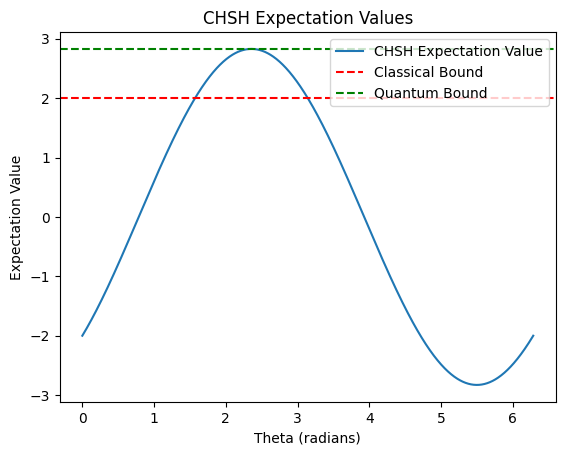

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the CHSH function
def chsh_expectation(theta_a, theta_b):
    return np.cos(theta_a - theta_b) - np.cos(theta_a + theta_b)

# Generate theta values
number_of_thetas = 1000
theta_values = np.linspace(0, 2 * np.pi, number_of_thetas)

# Initialize arrays for expectation values
expectation_values = []

# Compute expectation values for the CHSH inequality
for theta in theta_values:
    theta_a0 = 0
    theta_a1 = np.pi / 2
    theta_b0 = theta
    theta_b1 = theta + np.pi / 2

    # Compute the CHSH expectation value
    S = (chsh_expectation(theta_a0, theta_b0) +
         chsh_expectation(theta_a0, theta_b1) +
         chsh_expectation(theta_a1, theta_b0) -
         chsh_expectation(theta_a1, theta_b1))

    expectation_values.append(S)

# Plot the results
plt.plot(theta_values, expectation_values, label='CHSH Expectation Value')
plt.axhline(2, color='r', linestyle='--', label='Classical Bound')
plt.axhline(2 * np.sqrt(2), color='g', linestyle='--', label='Quantum Bound')
plt.xlabel('Theta (radians)')
plt.ylabel('Expectation Value')
plt.title('CHSH Expectation Values')
plt.legend()
plt.show()


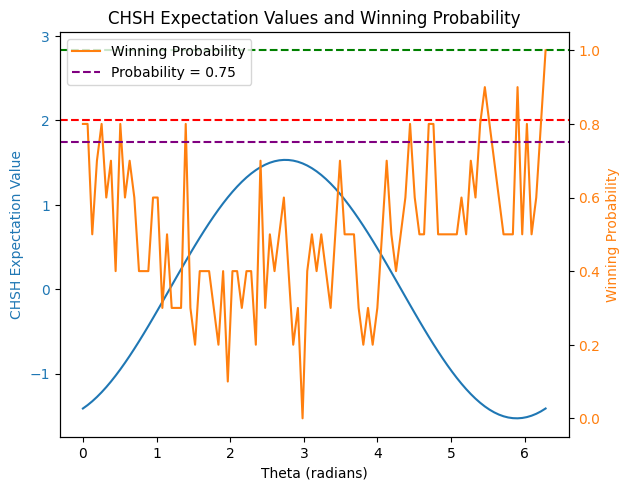

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the CHSH function
def chsh_expectation(theta_a, theta_b):
    return np.cos(theta_a - theta_b) - np.cos(theta_a + theta_b)

# Function to calculate winning probability
def calculate_probability(theta_a0, theta_a1, theta_b0, theta_b1, shots=10):
    winning_shots = 0
    for _ in range(shots):
        a = np.random.randint(2)
        b = np.random.randint(2)

        if a == 0:
            theta_a = theta_a0
        else:
            theta_a = theta_a1

        if b == 0:
            theta_b = theta_b0
        else:
            theta_b = theta_b1

        p0 = (1 + np.cos(theta_a - theta_b)) / 2
        p1 = 1 - p0
        outcome = np.random.choice([0, 1], p=[p0, p1])

        if outcome == ((a * b) % 2):
            winning_shots += 1

    return winning_shots / shots

# Generate theta values
number_of_thetas = 100
theta_values = np.linspace(0, 2 * np.pi, number_of_thetas)

# Initialize arrays for expectation values and probabilities
expectation_values = []
probabilities = []

# Compute expectation values and probabilities for the CHSH inequality
for theta in theta_values:
    theta_a0 = 0
    theta_a1 = np.pi / 2
    theta_b0 = theta
    theta_b1 = theta + np.pi / 4  # Adjusted angle to maximize CHSH violation

    # Compute the CHSH expectation value
    S = (chsh_expectation(theta_a0, theta_b0) +
         chsh_expectation(theta_a0, theta_b1) +
         chsh_expectation(theta_a1, theta_b0) -
         chsh_expectation(theta_a1, theta_b1))

    expectation_values.append(S)

    # Calculate the winning probability
    prob = calculate_probability(theta_a0, theta_a1, theta_b0, theta_b1)
    probabilities.append(prob)

# Plot the results
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Theta (radians)')
ax1.set_ylabel('CHSH Expectation Value', color=color)
ax1.plot(theta_values, expectation_values, color=color, label='CHSH Expectation Value')
ax1.axhline(2, color='r', linestyle='--', label='Classical Bound')
ax1.axhline(2 * np.sqrt(2), color='g', linestyle='--', label='Quantum Bound')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Winning Probability', color=color)
ax2.plot(theta_values, probabilities, color=color, label='Winning Probability')
ax2.axhline(0.75, color='purple', linestyle='--', label='Probability = 0.75')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('CHSH Expectation Values and Winning Probability')
plt.legend(loc='upper left')
plt.show()


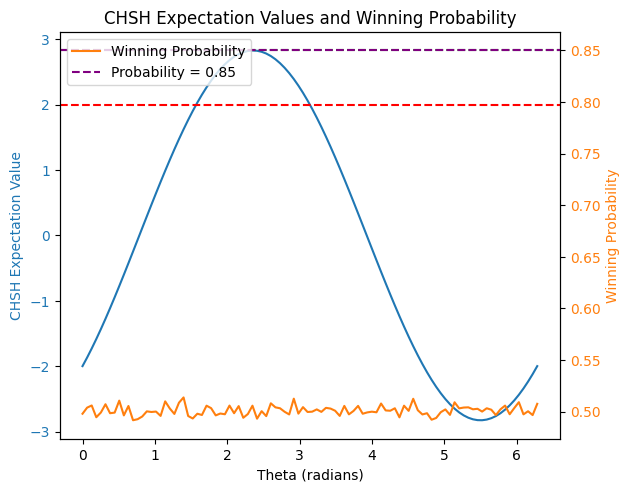

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the CHSH function
def chsh_expectation(theta_a, theta_b):
    return np.cos(theta_a - theta_b) - np.cos(theta_a + theta_b)

# Function to calculate winning probability
def calculate_probability(theta_a0, theta_a1, theta_b0, theta_b1, shots=10000):
    winning_shots = 0
    for _ in range(shots):
        a = np.random.randint(2)
        b = np.random.randint(2)

        if a == 0:
            theta_a = theta_a0
        else:
            theta_a = theta_a1

        if b == 0:
            theta_b = theta_b0
        else:
            theta_b = theta_b1

        p0 = (1 + np.cos(theta_a - theta_b)) / 2
        p1 = 1 - p0
        outcome = np.random.choice([0, 1], p=[p0, p1])

        if outcome == ((a * b) % 2):
            winning_shots += 1

    return winning_shots / shots

# Generate theta values
number_of_thetas = 100
theta_values = np.linspace(0, 2 * np.pi, number_of_thetas)

# Initialize arrays for expectation values and probabilities
expectation_values = []
probabilities = []

# Compute expectation values and probabilities for the CHSH inequality
for theta in theta_values:
    theta_a0 = 0
    theta_a1 = np.pi / 2
    theta_b0 = theta
    theta_b1 = theta + np.pi / 2

    # Compute the CHSH expectation value
    S = (chsh_expectation(theta_a0, theta_b0) +
         chsh_expectation(theta_a0, theta_b1) +
         chsh_expectation(theta_a1, theta_b0) -
         chsh_expectation(theta_a1, theta_b1))

    expectation_values.append(S)

    # Calculate the winning probability
    prob = calculate_probability(theta_a0, theta_a1, theta_b0, theta_b1)
    probabilities.append(prob)

# Plot the results
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Theta (radians)')
ax1.set_ylabel('CHSH Expectation Value', color=color)
ax1.plot(theta_values, expectation_values, color=color, label='CHSH Expectation Value')
ax1.axhline(2, color='r', linestyle='--', label='Classical Bound')
ax1.axhline(2 * np.sqrt(2), color='g', linestyle='--', label='Quantum Bound')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Winning Probability', color=color)
ax2.plot(theta_values, probabilities, color=color, label='Winning Probability')
ax2.axhline(0.85, color='purple', linestyle='--', label='Probability = 0.85')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('CHSH Expectation Values and Winning Probability')
plt.legend(loc='upper left')
plt.show()



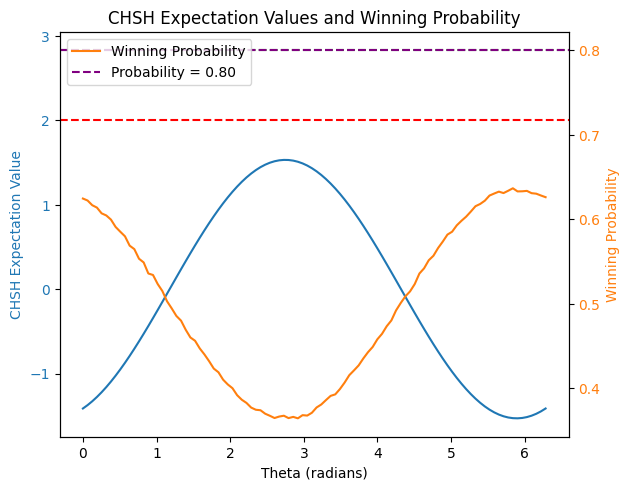

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the CHSH function
def chsh_expectation(theta_a, theta_b):
    return np.cos(theta_a - theta_b) - np.cos(theta_a + theta_b)

# Function to calculate winning probability
def calculate_probability(theta_a0, theta_a1, theta_b0, theta_b1, shots=100000):
    winning_shots = 0
    for _ in range(shots):
        a = np.random.randint(2)
        b = np.random.randint(2)

        if a == 0:
            theta_a = theta_a0
        else:
            theta_a = theta_a1

        if b == 0:
            theta_b = theta_b0
        else:
            theta_b = theta_b1

        p0 = (1 + np.cos(theta_a - theta_b)) / 2
        p1 = 1 - p0
        outcome = np.random.choice([0, 1], p=[p0, p1])

        if outcome == ((a * b) % 2):
            winning_shots += 1

    return winning_shots / shots

# Generate theta values
number_of_thetas = 100
theta_values = np.linspace(0, 2 * np.pi, number_of_thetas)

# Initialize arrays for expectation values and probabilities
expectation_values = []
probabilities = []

# Compute expectation values and probabilities for the CHSH inequality
for theta in theta_values:
    theta_a0 = 0
    theta_a1 = np.pi / 2
    theta_b0 = theta
    theta_b1 = theta + np.pi / 4  # Adjusted to optimize the CHSH value

    # Compute the CHSH expectation value
    S = (chsh_expectation(theta_a0, theta_b0) +
         chsh_expectation(theta_a0, theta_b1) +
         chsh_expectation(theta_a1, theta_b0) -
         chsh_expectation(theta_a1, theta_b1))

    expectation_values.append(S)

    # Calculate the winning probability
    prob = calculate_probability(theta_a0, theta_a1, theta_b0, theta_b1)
    probabilities.append(prob)

# Plot the results
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Theta (radians)')
ax1.set_ylabel('CHSH Expectation Value', color=color)
ax1.plot(theta_values, expectation_values, color=color, label='CHSH Expectation Value')
ax1.axhline(2, color='r', linestyle='--', label='Classical Bound')
ax1.axhline(2 * np.sqrt(2), color='g', linestyle='--', label='Quantum Bound')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Winning Probability', color=color)
ax2.plot(theta_values, probabilities, color=color, label='Winning Probability')
ax2.axhline(0.80, color='purple', linestyle='--', label='Probability = 0.80')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('CHSH Expectation Values and Winning Probability')
plt.legend(loc='upper left')
plt.show()


Time Evolution of CHSH Value

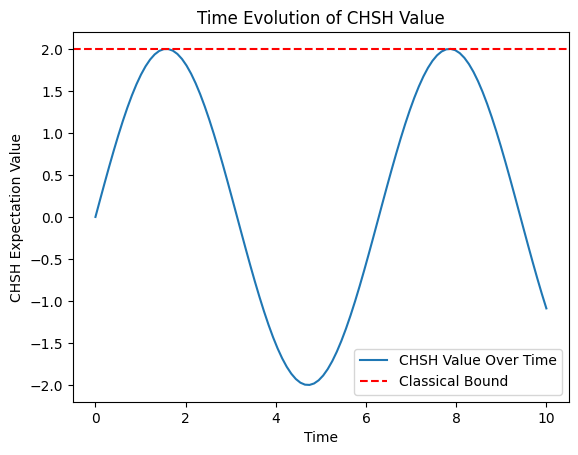

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated time data
time = np.linspace(0, 10, 100)
chsh_values = 2 * np.sin(time)  # Example function for demonstration

plt.plot(time, chsh_values, label='CHSH Value Over Time')
plt.axhline(2, color='r', linestyle='--', label='Classical Bound')
plt.xlabel('Time')
plt.ylabel('CHSH Expectation Value')
plt.title('Time Evolution of CHSH Value')
plt.legend()
plt.show()


Histogram of Measurement Outcomes

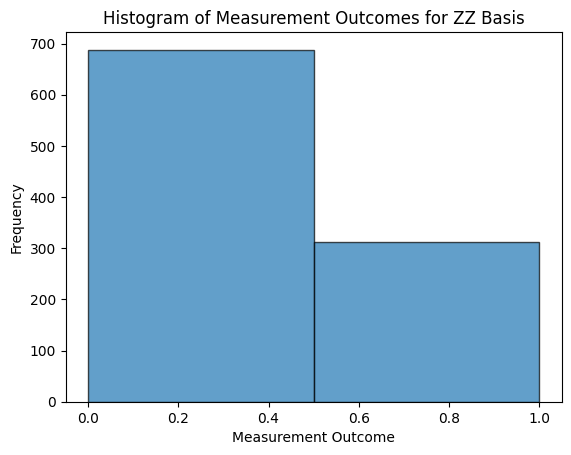

In [18]:
import numpy as np

# Example probabilities (for demonstration purposes)
probabilities = {
    'ZZ': [0.7, 0.3],  # Example probabilities for outcome 0 and 1 for ZZ basis
    'ZX': [0.4, 0.6],  # Example probabilities for outcome 0 and 1 for ZX basis
    'XZ': [0.5, 0.5],  # Example probabilities for outcome 0 and 1 for XZ basis
    'XX': [0.2, 0.8]   # Example probabilities for outcome 0 and 1 for XX basis
}

# Generate measurement outcomes based on these probabilities
def generate_counts(probabilities, num_measurements):
    counts = {}
    for basis, probs in probabilities.items():
        outcomes = np.random.choice([0, 1], size=num_measurements, p=probs)
        counts[basis] = outcomes
    return counts

# Generate random counts for demonstration (replace with actual counts)
num_measurements = 1000
counts = generate_counts(probabilities, num_measurements)

# Example for plotting one of the basis outcomes
data = counts['ZZ']  # Choose 'ZZ' or any other basis
plt.hist(data, bins=2, edgecolor='k', alpha=0.7)
plt.xlabel('Measurement Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Measurement Outcomes for ZZ Basis')
plt.show()



 Comparison of Classical and Quantum Bounds

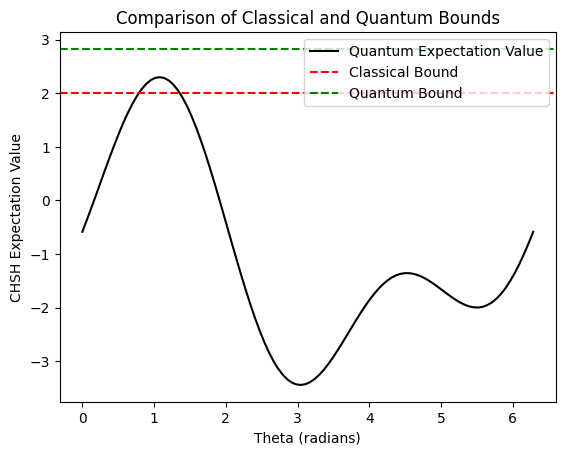

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def chsh_expectation(theta_a, theta_b):
    return np.cos(theta_a - theta_b) - np.cos(theta_a + theta_b)

number_of_thetas = 100
theta_values = np.linspace(0, 2 * np.pi, number_of_thetas)

# Fixed angles for Alice and Bob
theta_a_fixed = np.pi / 4
theta_b_fixed = np.pi / 4

expectation_values = []
for theta in theta_values:
    S = (chsh_expectation(theta_a_fixed, theta) +
         chsh_expectation(theta_a_fixed, theta + np.pi / 2) +
         chsh_expectation(theta + np.pi / 2, theta) -
         chsh_expectation(theta + np.pi / 2, theta + np.pi / 2))
    expectation_values.append(S)

plt.plot(theta_values, expectation_values, color = 'black', label='Quantum Expectation Value')
plt.axhline(2, color='r', linestyle='--', label='Classical Bound')
plt.axhline(2 * np.sqrt(2), color='g', linestyle='--', label='Quantum Bound')
plt.xlabel('Theta (radians)')
plt.ylabel('CHSH Expectation Value')
plt.title('Comparison of Classical and Quantum Bounds')
plt.legend()
plt.show()


CHSH Violation Region

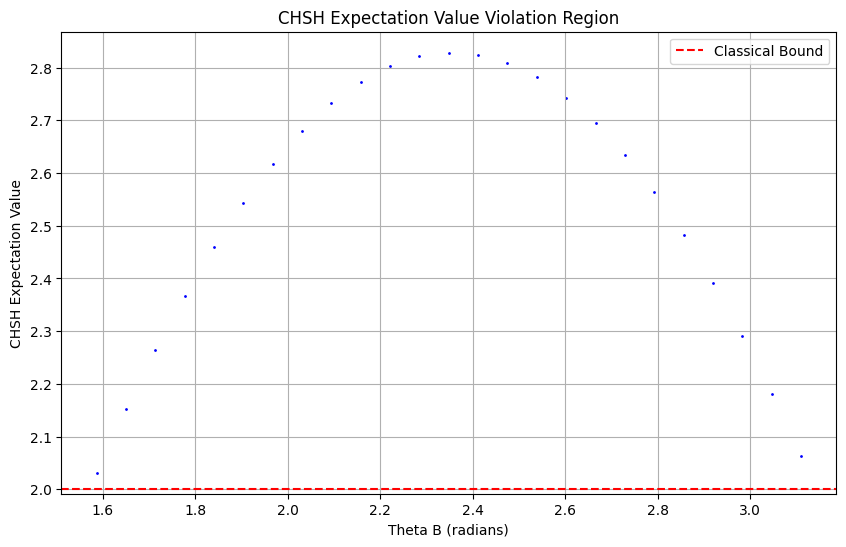

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def chsh_expectation(theta_a, theta_b):
    # The expectation value of the product of measurements in angles theta_a and theta_b
    return np.cos(theta_a - theta_b) - np.cos(theta_a + theta_b)

# Number of theta values
number_of_thetas = 100
theta_values = np.linspace(0, 2 * np.pi, number_of_thetas)

# Fixed measurement angles for Alice
theta_a0 = 0
theta_a1 = np.pi / 2

plt.figure(figsize=(10, 6))

# Loop over possible theta_b values
for theta_b in theta_values:
    # Compute the CHSH value for the given theta_b
    S = (chsh_expectation(theta_a0, theta_b) +
         chsh_expectation(theta_a0, theta_b + np.pi / 2) +
         chsh_expectation(theta_a1, theta_b) -
         chsh_expectation(theta_a1, theta_b + np.pi / 2))

    # Plot if the CHSH value exceeds the classical bound
    if S > 2:
        plt.scatter(theta_b, S, c='b', s=1)

# Add a horizontal line for the classical bound
plt.axhline(2, color='r', linestyle='--', label='Classical Bound')

plt.xlabel('Theta B (radians)')
plt.ylabel('CHSH Expectation Value')
plt.title('CHSH Expectation Value Violation Region')
plt.legend()
plt.grid(True)
plt.show()



CHSH Expectation Value vs. Theta for Different Angles



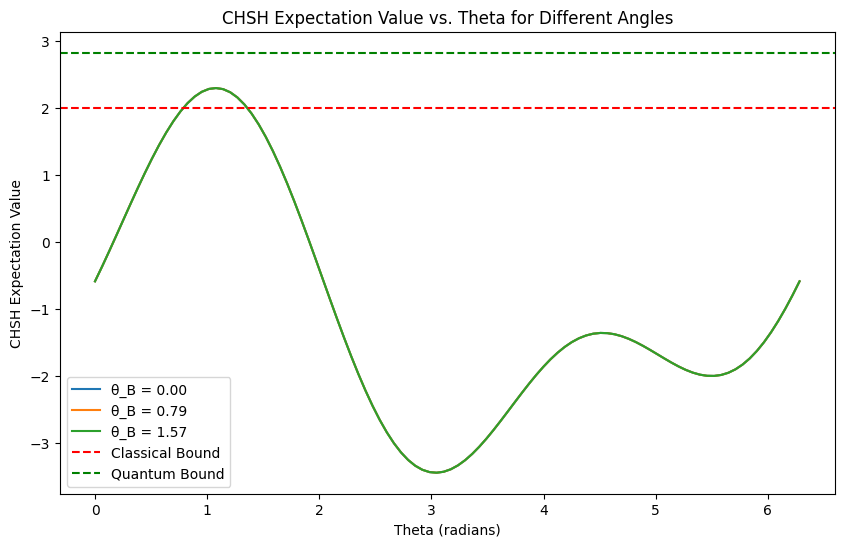

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def chsh_expectation(theta_a, theta_b):
    return np.cos(theta_a - theta_b) - np.cos(theta_a + theta_b)

number_of_thetas = 100
theta_values = np.linspace(0, 2 * np.pi, number_of_thetas)

# Define fixed angles for Alice and Bob
theta_a_fixed = np.pi / 4
theta_b_fixes = [0, np.pi / 4, np.pi / 2]

plt.figure(figsize=(10, 6))

for theta_b in theta_b_fixes:
    expectation_values = []
    for theta in theta_values:
        S = (chsh_expectation(theta_a_fixed, theta) +
             chsh_expectation(theta_a_fixed, theta + np.pi / 2) +
             chsh_expectation(theta + np.pi / 2, theta) -
             chsh_expectation(theta + np.pi / 2, theta + np.pi / 2))
        expectation_values.append(S)

    plt.plot(theta_values, expectation_values, label=f'θ_B = {theta_b:.2f}')

plt.axhline(2, color='r', linestyle='--', label='Classical Bound')
plt.axhline(2 * np.sqrt(2), color='g', linestyle='--', label='Quantum Bound')
plt.xlabel('Theta (radians)')
plt.ylabel('CHSH Expectation Value')
plt.title('CHSH Expectation Value vs. Theta for Different Angles')
plt.legend()
plt.show()


Schmidt Decomposition:
U (Unitary matrix for the first subsystem):
[[1. 0.]
 [0. 1.]]
S (Schmidt coefficients):
[[0.70710678 0.        ]
 [0.         0.70710678]]
Vh (Unitary matrix for the second subsystem, conjugate transpose):
[[1. 0.]
 [0. 1.]]


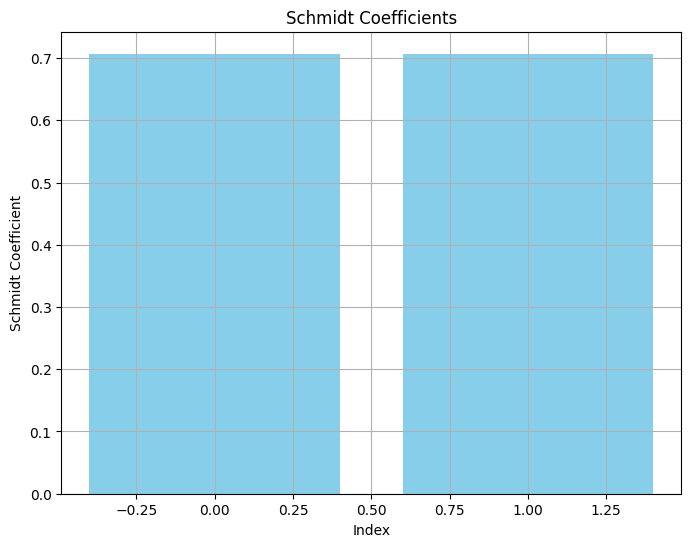

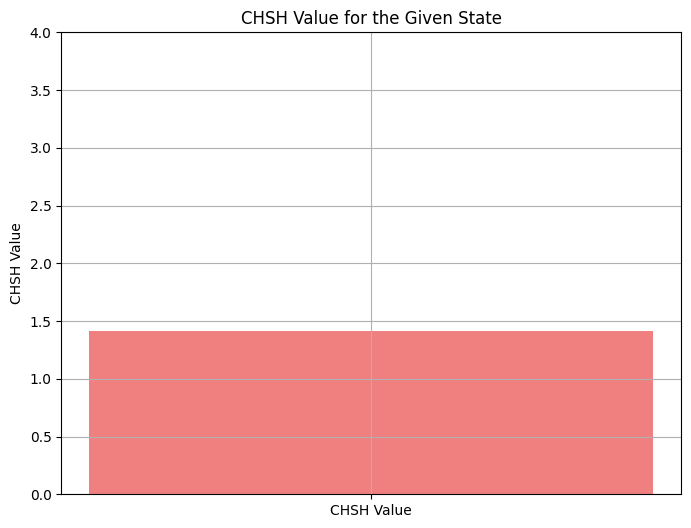

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

def schmidt_decomposition(state_vector):
    """
    Perform Schmidt decomposition of a 2-qubit state vector.

    Args:
        state_vector (np.array): The 2-qubit state vector to decompose.

    Returns:
        U (np.array): The unitary matrix for the first subsystem.
        S (np.array): The Schmidt coefficients (singular values).
        Vh (np.array): The unitary matrix for the second subsystem (conjugate transpose).
    """
    dim = int(np.sqrt(len(state_vector)))
    state_matrix = state_vector.reshape((dim, dim))

    # Perform Singular Value Decomposition (SVD)
    U, S, Vh = svd(state_matrix)

    # Schmidt coefficients are the singular values
    S = np.diag(S)

    return U, S, Vh

def plot_schmidt_decomposition(S):
    """
    Plot the Schmidt coefficients.

    Args:
        S (np.array): Schmidt coefficients (diagonal matrix).
    """
    coefficients = np.diag(S)
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(coefficients)), coefficients, color='skyblue')
    plt.xlabel('Index')
    plt.ylabel('Schmidt Coefficient')
    plt.title('Schmidt Coefficients')
    plt.grid(True)
    plt.show()

def correlation_measurement(state, a, b):
    """
    Compute the correlation measurement ⟨A_i B_j⟩ for the given state.

    Args:
        state (np.array): The state vector.
        a (int): Measurement setting for Alice.
        b (int): Measurement setting for Bob.

    Returns:
        float: The correlation value ⟨A_i B_j⟩.
    """
    # Measurement operators for Alice and Bob
    A = np.array([[1, 0], [0, -1]]) if a == 1 else np.array([[1, 1], [1, -1]]) / np.sqrt(2)
    B = np.array([[1, 0], [0, -1]]) if b == 1 else np.array([[1, 1], [1, -1]]) / np.sqrt(2)

    # Tensor product of measurement operators
    M = np.kron(A, B)

    # Compute correlation
    return np.real(np.dot(state.T.conj(), np.dot(M, state)))

def chsh_value(state):
    """
    Compute the CHSH value for the given state.

    Args:
        state (np.array): The state vector.

    Returns:
        float: The CHSH value.
    """
    terms = [
        correlation_measurement(state, 1, 1),
        correlation_measurement(state, 1, 2),
        correlation_measurement(state, 2, 1),
        correlation_measurement(state, 2, 2)
    ]
    return abs(terms[0] + terms[1] + terms[2] - terms[3])

def plot_chsh_value(state):
    """
    Plot the CHSH value for the given state.

    Args:
        state (np.array): The state vector.
    """
    # Compute CHSH value
    chsh = chsh_value(state)

    # Plot CHSH value
    plt.figure(figsize=(8, 6))
    plt.bar(['CHSH Value'], [chsh], color='lightcoral')
    plt.ylabel('CHSH Value')
    plt.title('CHSH Value for the Given State')
    plt.ylim([0, 4])  # Set a reasonable y-axis limit for visualization
    plt.grid(True)
    plt.show()

def main():
    # Example entangled state |Ψ> = 1/sqrt(2) (|00> + |11>)
    state_vector = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

    # Perform Schmidt decomposition
    U, S, Vh = schmidt_decomposition(state_vector)

    print("Schmidt Decomposition:")
    print("U (Unitary matrix for the first subsystem):")
    print(U)
    print("S (Schmidt coefficients):")
    print(S)
    print("Vh (Unitary matrix for the second subsystem, conjugate transpose):")
    print(Vh)

    # Plot Schmidt decomposition
    plot_schmidt_decomposition(S)

    # Plot CHSH value
    plot_chsh_value(state_vector)

if __name__ == "__main__":
    main()


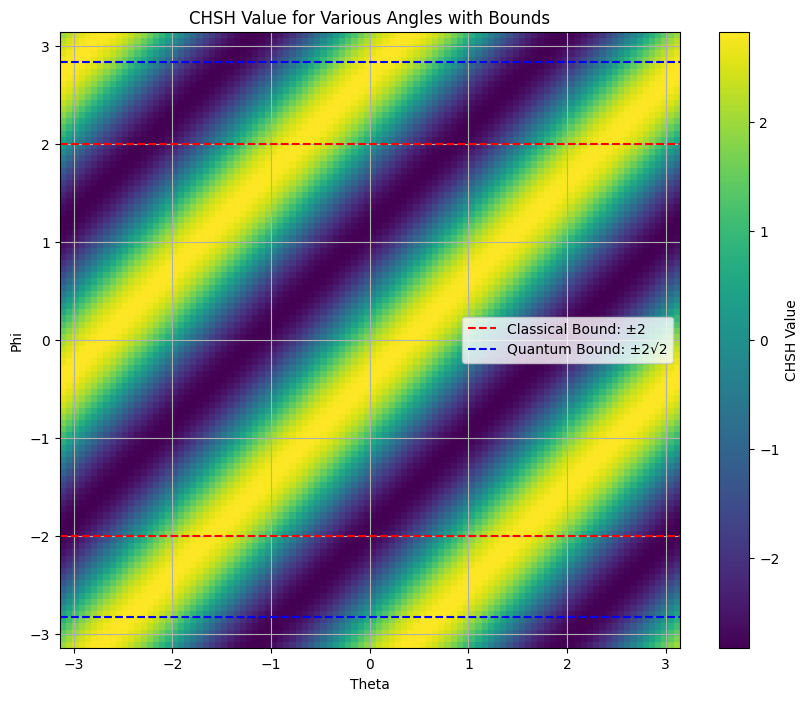

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# defining the function to calculate CHSH value
def calculate_chsh(theta_1, theta_2, phi_1, phi_2):
    # Calculate each term of the CHSH inequality
    E_A1_B1 = np.cos(theta_1 - phi_1)**2 - np.sin(theta_1 - phi_1)**2
    E_A1_B2 = np.cos(theta_1 - phi_2)**2 - np.sin(theta_1 - phi_2)**2
    E_A2_B1 = np.cos(theta_2 - phi_1)**2 - np.sin(theta_2 - phi_1)**2
    E_A2_B2 = np.cos(theta_2 - phi_2)**2 - np.sin(theta_2 - phi_2)**2

    # Computing the CHSH value
    S = E_A1_B1 + E_A1_B2 + E_A2_B1 - E_A2_B2
    return S

# Define ranges for theta and phi
theta_range = np.linspace(-np.pi, np.pi, 100)
phi_range = np.linspace(-np.pi, np.pi, 100)

# Initialize results matrix
S_values = np.zeros((len(theta_range), len(phi_range)))

# Calculate CHSH for various theta and phi
for i, theta in enumerate(theta_range):
    for j, phi in enumerate(phi_range):
        # Compute CHSH for given (theta, phi) and (theta + pi/4, phi - pi/4)
        S_values[i, j] = calculate_chsh(theta, theta + np.pi/4, phi, phi - np.pi/4)

# Plot results
plt.figure(figsize=(10, 8))
plt.imshow(S_values, extent=[-np.pi, np.pi, -np.pi, np.pi], origin='lower', aspect='auto', cmap='viridis', vmin=-2*np.sqrt(2), vmax=2*np.sqrt(2))
plt.colorbar(label='CHSH Value')

# Add classical and quantum bounds
plt.axhline(y=2, color='r', linestyle='--', label='Classical Bound: ±2')
plt.axhline(y=-2, color='r', linestyle='--')

plt.axhline(y=2 * np.sqrt(2), color='b', linestyle='--', label='Quantum Bound: ±2√2')
plt.axhline(y=-2 * np.sqrt(2), color='b', linestyle='--')

# Labeling the plot
plt.xlabel('Theta')
plt.ylabel('Phi')
plt.title('CHSH Value for Various Angles with Bounds')
plt.legend()
plt.grid(True)
plt.show()
